<a href="https://colab.research.google.com/github/KaissonFerreira/Projeto_SeP500_Financial_Actions/blob/main/Jupyter_Notebook/New_project_S%26P500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

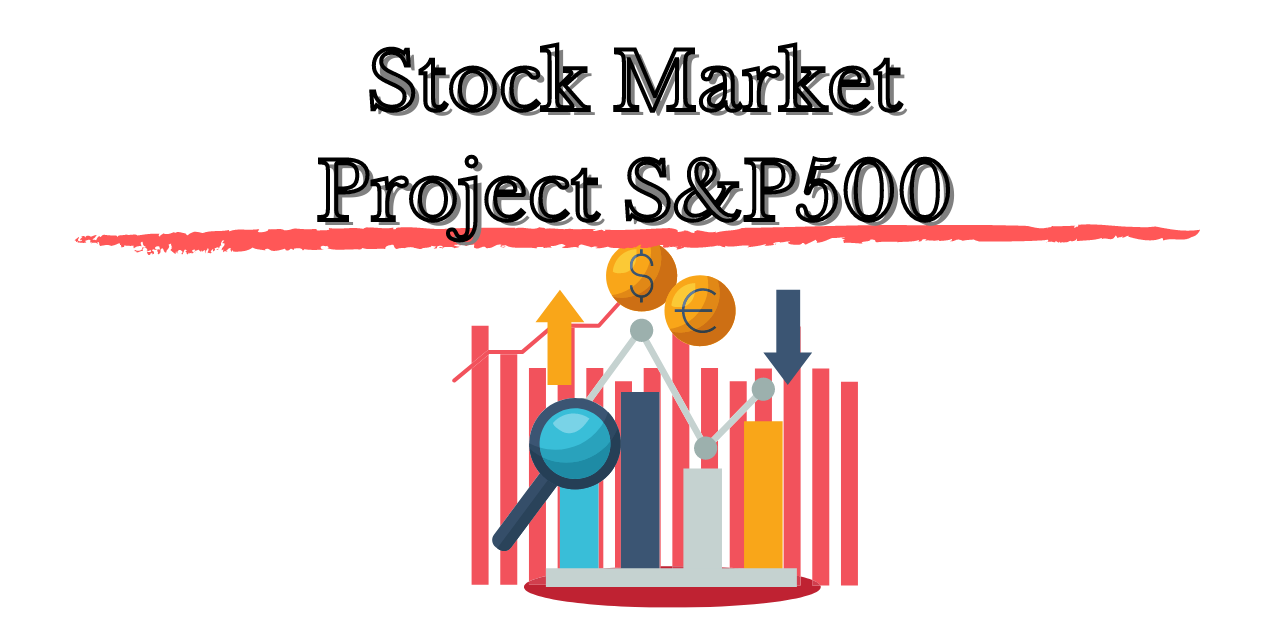

#**S&P 500 - (banco de dados retirados do Kaggle)**
https://www.kaggle.com/paytonfisher/sp-500-companies-with-financial-information



---



---



#**Passo a passo desse projeto de dados** :



1.   Conhecer o banco de dados
2.   Entendimento sobre a análise financeira no mercado de ações
3.   Entendimento sobre os principais indicadores financeiros
4.   Adoção de estratégias para geração de insights
5.   Extração/Obtenção de dados
6.   Ajuste de dados (tratamento/limpeza)
7.   Filtragem dos dados por setor
8.   Análise exploratória
9.   Interpretação dos resultados (Conclusão)


---

##INTRODUÇÃO##


---


  O S&P 500 é um índice ponderado por capitalização das **500 maiores empresas de capital aberto** dos Estados Unidos. Esse índice é útil para estudar porque geralmente reflete a saúde de todo o mercado de ações dos Estados Unidos. 

  No banco de dados proposto, podemos encontrar alguns dos principais indicadores para investir em uma empresa. Assim, um dos objetivos desse projeto é **analisar as empresas que possuem maiores chances de valorização em suas ações** dentro do S&P500. Entretanto, vale ressaltar que por si só, esses indicadores não são suficientes para ter um alto grau de confiabilidade a longo prazo, mas é possível retirar alguns insight que possam **auxiliar** na tomada de decisão do investidor, para assim escolher em qual ação investir.

  Há dois métodos de avaliação para analisar se vale a pena investir em uma determinada ação de uma empresa. O primeiro deles é a **análise fundamentalista**, que tem por objetivo obter lucros no investimento a médio e longo prazo, e a **análise técnica**, que tem por objetivo obter ganhos financeiros a curto prazo, uma vez que o foco desse tipo de análise são os padrões e movimentações das ações por meio de gráficos.

  Nesse projeto, é abordado uma análise fundamentalista, e a escolha dessa análise foi fundamentada nos tipos de indicadores fornecidos no banco de dado provenientes do Kaggle. Vale ressaltar, que esse tipo de análise consiste em fundamentos quantitativos e qualitativos, sendo eles:

* **Fundamentos quantitativos**: São aqueles que são medidos em números **(os 
dados para esse projeto estão inseridos nessa categoria)**.

* **Fundamentos qualitativos**: São fatores internos e externos que podem contribuir com a rentabilidade e crescimento da empresa, favorencendo seus ganhos financeiros, mas que também podem levar uma empresa ao prejuízo, e consequentemente, aos acionistas. (ex: Macroeconomia, gestão da empresa, situação do mercado e etc.)






#**Estratégias a serem utilizadas para geração de Insights**

---
Para ficar mais claro o objetivo, as ações tem que ser escolhidas para um investidor mais conservador, ou seja, que não tenha muitos riscos, mas que também possa ter uma alta lucratividade. 

Sendo assim, a primeira estratégia é categorizar as empresas por setor, temos que:
* Identificar quais são os setores que tem uma maior lucrativade;
* Identificar quais são os setores que tem um maior retorno de dividendos para os acionistas;
* Identificar quais são os setores mais valiosos no mercado (Market cap);
* Escolher o setor mais atrativo;

E a segunda estratégia é analisar as empresas do setor mais atrativo, temos que: 

* Identificar quais são as melhores empresas para se investir, analisando o P/E e o dividend Yield;
* Filtrar as empresas (caso tenham muitas) a partir do tipo de investidor, ou seja, um menor preço e um maior retorno.
* Analisar o Market Cap (capitalização de mercado) das empresas escolhidas;
* Identificar quais empresas apresentam uma melhor gestão operacional de caixa, sem atribuir os efeitos financeiros e de impostos; (Analisar o EBITDA)
* Identificar quais são as empresas que demonstram um maior potencial de crescimento; (Analisar o Price/book)

## **Import**


Importando algumas bibliotecas que serão utilizadas no projeto:


In [3]:
# Bibliotecas para visualização dos dados: 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Biblioteca interessante para uma análise mais detalhada dentro das figuras, tipo um Dashboard.
import plotly.graph_objects as go 



## **Extração e tratamento**

Importando a base de dados e verificando se há elementos faltantes.

In [4]:
url = 'https://github.com/KaissonFerreira/Projeto_SeP500_Financial_Actions/raw/main/financials.csv'
df=pd.read_csv(url)
df.head(2)


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [5]:
# Renomeando algumas colunas
df=df.rename(columns={'Price/Earnings':'P/E','Dividend Yield':'DY','Earnings/Share':'E','Price/Sales':'P/S','Price/Book':'P/B'})

In [6]:
#Soma dos elementos faltantes em cada atributo (coluna)
print(df.isnull().sum()) 

Symbol          0
Name            0
Sector          0
Price           0
P/E             2
DY              0
E               0
52 Week Low     0
52 Week High    0
Market Cap      0
EBITDA          0
P/S             0
P/B             8
SEC Filings     0
dtype: int64


Observa-se que há alguns elementos vazios no indicador P/E (Price/Earnings ou preço da ação pelo lucro). Então podemos calcular as células faltantes pela razão entre os dados da coluna Price (Preço da ação) e da coluna E (Earnings/Shere ou lucro por ação).

In [7]:
df['P/E'].fillna(df['Price']/df['E'], inplace=True) # Simples cálculo de Preço sobre o Lucro
print(df['P/E'].isnull().sum()) #Verificando se de fato foram preenchidos os dados faltante na coluna Price/Earnings.

0


In [8]:
# Analisando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        505 non-null    object 
 1   Name          505 non-null    object 
 2   Sector        505 non-null    object 
 3   Price         505 non-null    float64
 4   P/E           505 non-null    float64
 5   DY            505 non-null    float64
 6   E             505 non-null    float64
 7   52 Week Low   505 non-null    float64
 8   52 Week High  505 non-null    float64
 9   Market Cap    505 non-null    float64
 10  EBITDA        505 non-null    float64
 11  P/S           505 non-null    float64
 12  P/B           497 non-null    float64
 13  SEC Filings   505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


Os elementos vazios presentes na coluna P/B (Price/Book ou preço sobre valor patrimonial) não serão tratados no momento. Quando ocorrer as análises sobre esse indicador, poderemos afirmar de qual maneira ele poderá ser tratado.
Desse modo, terminamos a parte de tratamento e limpeza dos dados.

##**Análise Exploratória**


---



---


Na análise exploratória, poderemos retirar alguns dos insights propostos no inicio desse projeto. Para isso, será dividido em dois segmentos, um caracterizado pela análise entre setores e o outro carcterizado pela análise de empresas do mesmo setor (diga-se por passagem, que é uma análise bem mais conveniente).

###**Comparação de alguns indicadores entre o mesmo setor**


---
Nesta seção, será feita apenas uma análise superficial de 3 indicadores (DY - Rendimento de dividendos, P/E - Preço da ação por lucro e Market Cup - Que significa a capitalização de recursos) por setor. Apesar de que a comparação entre setores não ser tão interessante na análise fundamentalista, pode-se observar algumas tendências para a escolha de algum setor, e por fim analisar e comparar os indicadores das empresas daquele setor.

**Analisando a quantidade empresas por setor:**

In [9]:
# Verificando a quantidade de empresas por setor em ordem decrescente
df['Sector'].value_counts().sort_values(ascending=False)


Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

Text(0, 0.5, 'Quantidade de empresas')

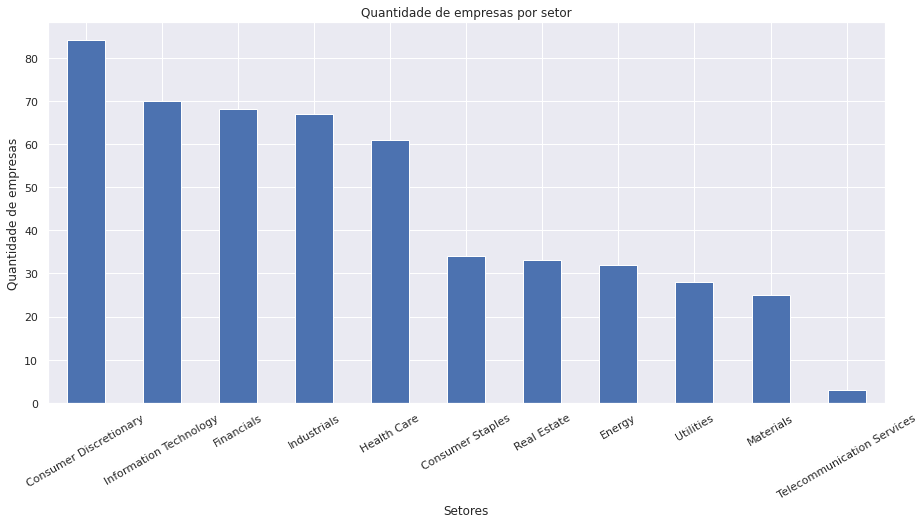

In [10]:
# A escolha do grafico de barras foi escolhido para demonstrar com maior clareza.
sns.set()

plt.figure(figsize=[15,7])
df['Sector'].value_counts().sort_values(ascending=False).plot.bar(rot=30,title='Quantidade de empresas por setor')
plt.xlabel('Setores')
plt.ylabel('Quantidade de empresas')                                                             

**Analisando os rendimentos de dividendos de cada setor:**

In [11]:
#  Setores que mais pagam dividendos em ordem decrescente
ordem_DY=df.groupby('Sector')['DY'].sum().sort_values(ascending=False)

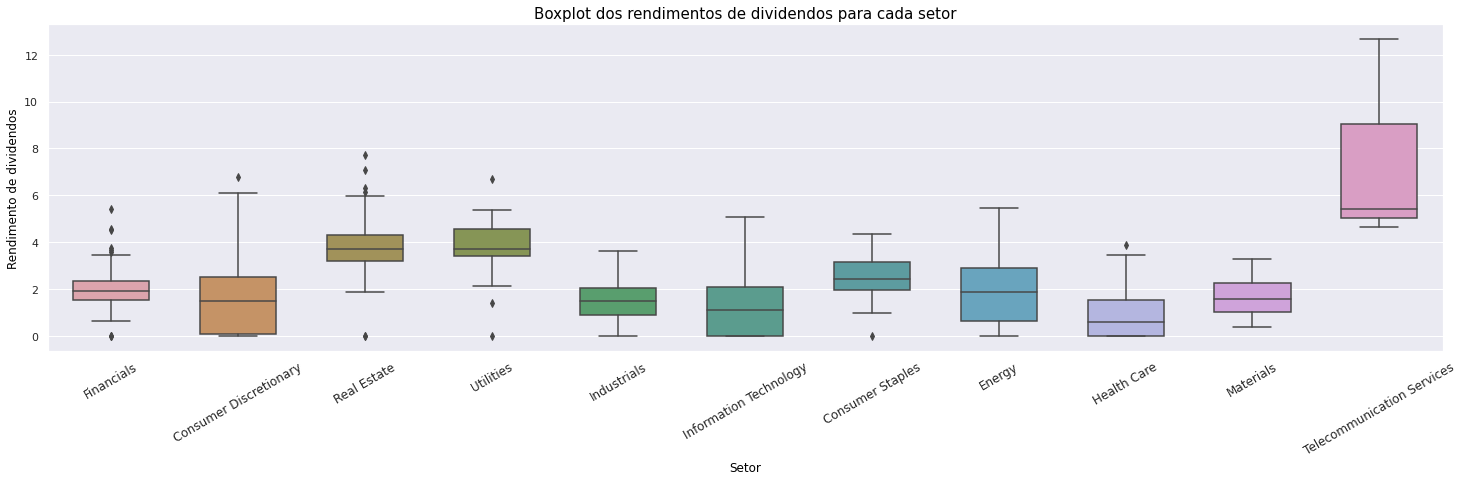

In [12]:
#  Boxplot dos setores que mais pagam dividendos em ordem decrescente
#  O gráfico de boxplot foi escolhido para demonstrar uma maior riqueza nos detalhes da estatística descritiva de cada setor, referente ao indicador escolhido.

plt.figure(figsize= (25,6))
plt.title('Boxplot dos rendimentos de dividendos para cada setor', fontdict={'fontsize' : 15, 'color':'black'})
sns.boxplot(x='Sector',y='DY',data=df, width=0.6, saturation=0.5, order=ordem_DY.index )
plt.xticks(fontsize=12, rotation = 30)
plt.xlabel('Setor', fontsize = 12, color= 'black')
plt.ylabel('Rendimento de dividendos', fontsize = 12, color='black');


Observa-se que alguns dos setores com menos empresas, como o setor de telecomunicação, o setor de utilidade e o setor de imobiliária, tem os melhores rendimentos de uma maneira geral. Diante disso, poderíamos aprofundar um pouco mais nesses setores, caso o investidor estivesse interessado em captar bons dividendos.
 
 Entretanto, nos dois útimos sitados, percebe-se a presença de outiliers apesar de ter uma concentração maior em torno de 3 à 5 dólares. Então, deve-se ficar atento para a escolha de empresas que possuem um melhor pagamento de dividendos.

Já o caso das empresas de Telecomunicações, apesar de ter apenas 3 empresas, elas demonstram um bom pagamento de dividendos. Valeria a pena investigar se as causas disso é apenas para atrair investidores ou se realmente há um bom fluxo de caixa com alta liquidez ou lucratividade.

**Analisando o P/E:**

In [13]:
#  Setores agrupados pelo indicador preço/lucro em ordem decrescente
ordem_PL=df.groupby('Sector')['P/E'].sum().sort_values(ascending=False)
ordem_PL

Sector
Information Technology        2602.590000
Consumer Discretionary        2142.863206
Industrials                   1440.120000
Health Care                   1403.255362
Energy                        1233.890000
Financials                    1169.530000
Consumer Staples               746.750000
Real Estate                    741.150000
Materials                      513.560000
Utilities                      471.700000
Telecommunication Services      33.570000
Name: P/E, dtype: float64

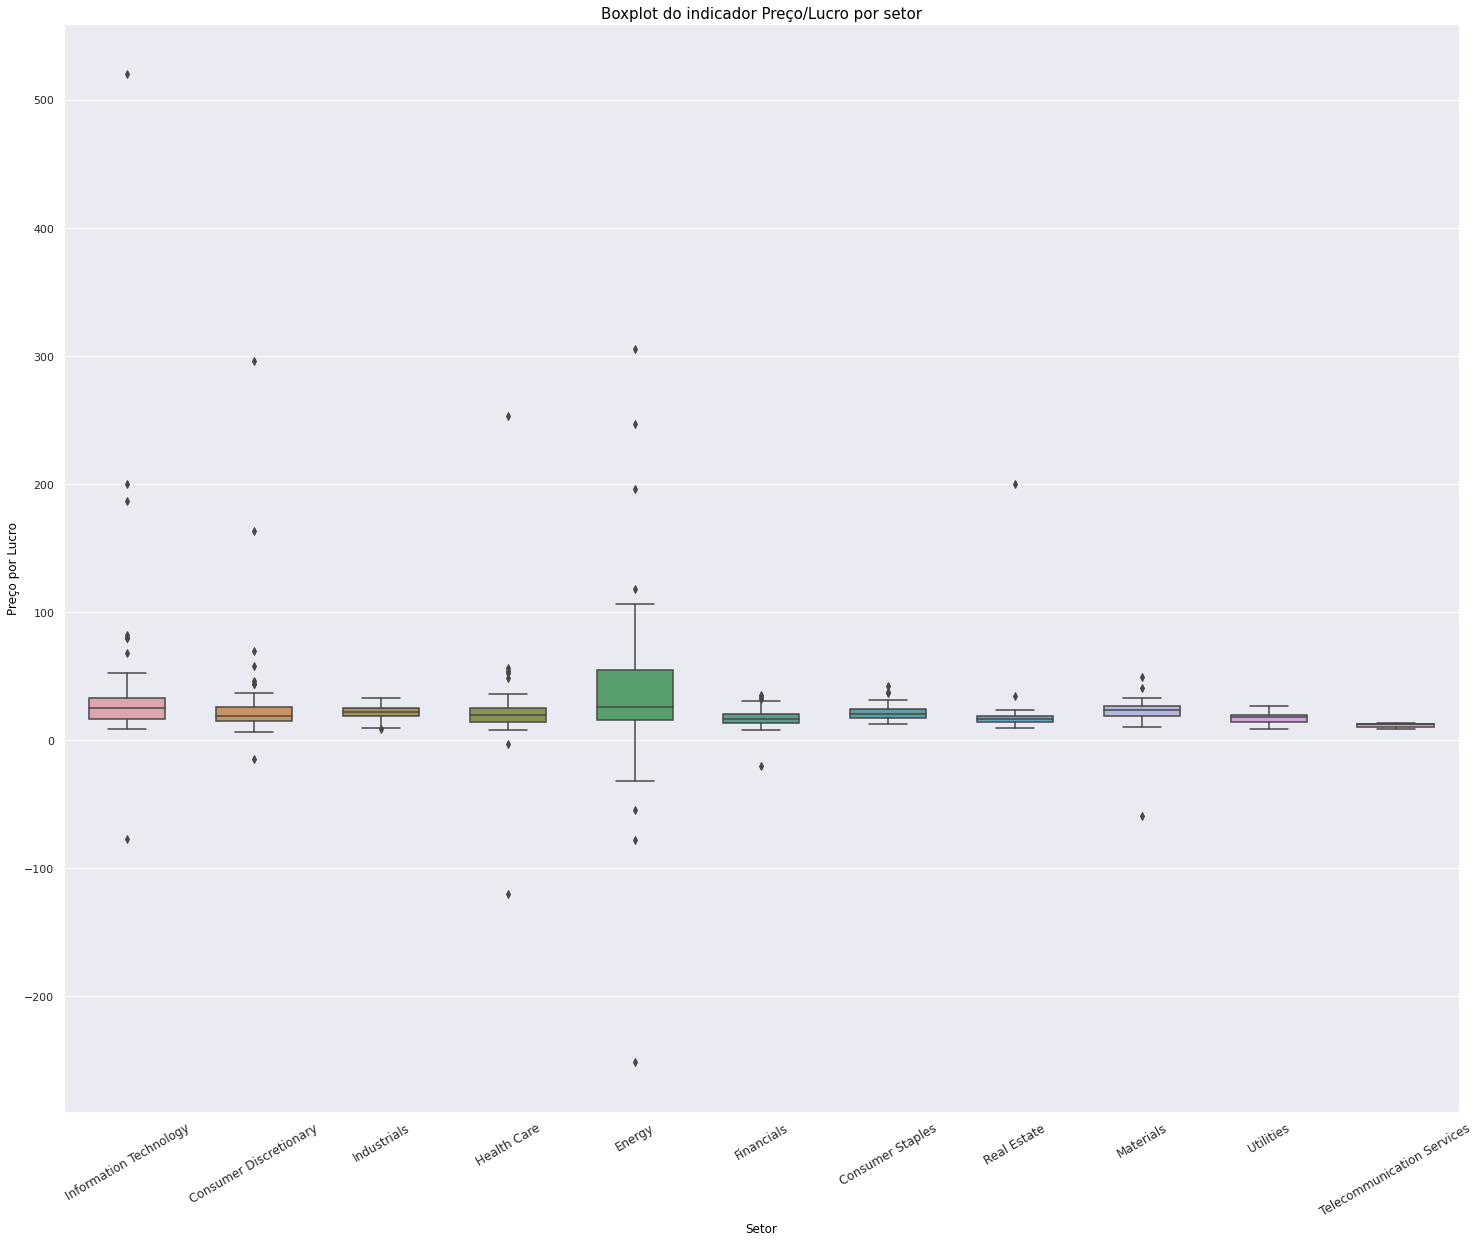

In [14]:
plt.figure(figsize= (25,20))
plt.title('Boxplot do indicador Preço/Lucro por setor', fontdict={'fontsize' : 15, 'color':'black'})
sns.boxplot(x='Sector',y='P/E',data=df, width=0.6, saturation=0.5, order=ordem_PL.index,orient='v' )
plt.xticks(fontsize=12, rotation = 30)
plt.xlabel('Setor', fontsize = 12, color= 'black')
plt.ylabel('Preço por Lucro', fontsize = 12, color='black');

Quando o indicador P/E está muito elevado, isso demonstra que os investidores estão esperando um maior crescimento dos lucros futuros em comparação com às empresas do mesmo setor que estão com indicador mais baixo, ou pode ser que a ação esteja cara demais. Diante disso, podemos observar que alguns setores como consumo dicricionário e tecnologia da informação, podem ter empresas que possuam potencial de crescimento. 

Tais setores são ideais para uma avaliação em investimentos a longo prazo, uma vez que o objetivo aqui não é o pagamento de dividendos em si, mas sim a valorização das ações ao longo do tempo. Mas claro, se houver uma conciliação com um bom pagamento de dividendos, é perfeito!

O setor de energia é o que demonstra mais empresas com menos atratividade para investidores a longo prazo, uma vez que possuem muitas empresas abaixo do índice 0 (atenção ao valor mínimo e aos outliers abaixo desse valor), mas pode ser que pagam bons dividendos. Apesar disso, há também boas empresas, então pode compensar fazer uma boa análise. Vale ressaltar que o risco de encontrar uma empresa menos atrativa do ponto de vista potencial, é maior que os outros setores.

**Analisando o Market Cap:**

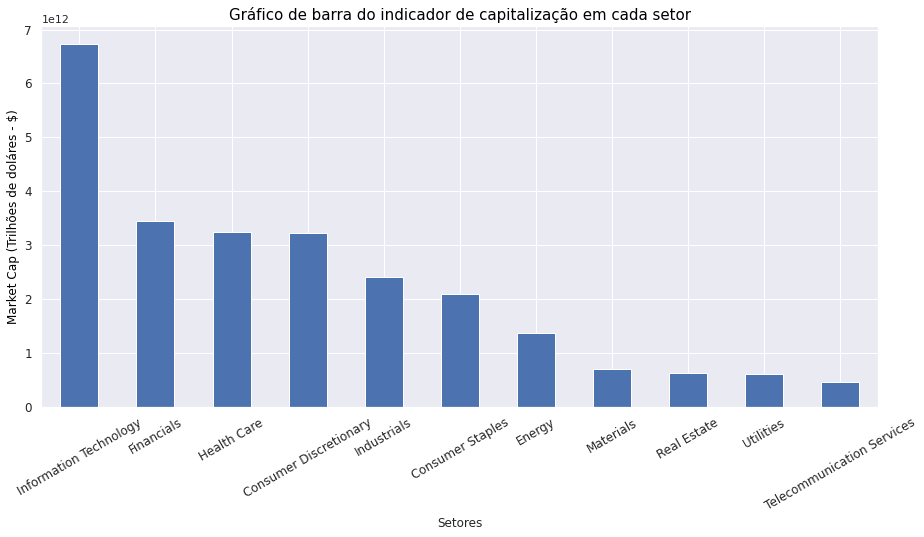

In [15]:
# A escolha do grafico de barras foi escolhido para demonstrar com maior clareza.
sns.set()

plt.figure(figsize=[15,7])
df.groupby('Sector')['Market Cap'].sum().sort_values(ascending=False).plot.bar(rot=30, fontsize=12)
plt.title('Gráfico de barra do indicador de capitalização em cada setor', fontsize=15, color='black')
plt.xlabel('Setores')
plt.ylabel('Market Cap (Trilhões de doláres - $)', fontsize = 12, color='black');

É perceptível que as empresas que mais capitalizam recursos no mercado financeiro é a área de tecnologia, eis um forte motivo para analisar esse setor de forma mais profunda. Como visto anteriormente na análise do indicador P/E, várias empresas desse setor mostram indícios de um potencial crescimento, e a enorme quantia de capitalização nesse setor só demonstra que o mercado está se expandindo cada vez mais, contribuindo para o crescimento dessas empresas.

###**Escolha do setor e comparação dos indicadores entre as empresas desse setor**
---
Por ser vários setores envolvidos e com muitos indicadores para analisar, temos que fragmentar o nosso campo de dados. Assim, escolheremos apenas o setor de **Tecnologia da informação** (Esse setor foi escolhido com base de que pode haver empresas que tem um elevado potencial de crescimento)


### **Analisando os indicadores Preço por lucro, Preço por ação e Lucro por ação**


**Indicador Preço sobre Lucro:**

Esses indicadores estão diretamente correlacionados, uma vez que P/E = Price (Preço por ação) / Earnings (Lucro por ação).
Assim, primeiramente iremos analisar o indicador P/E das empresas no setor de tecnologia:

In [16]:
# Filtrando os dados que são referentes somente ao setor de tecnologia
df_tec = df.query("'Information Technology' in Sector")

In [17]:
# Colocando o dataset em ordem descrescente de P/E
df_tec=df_tec.sort_values('P/E',ascending=False)

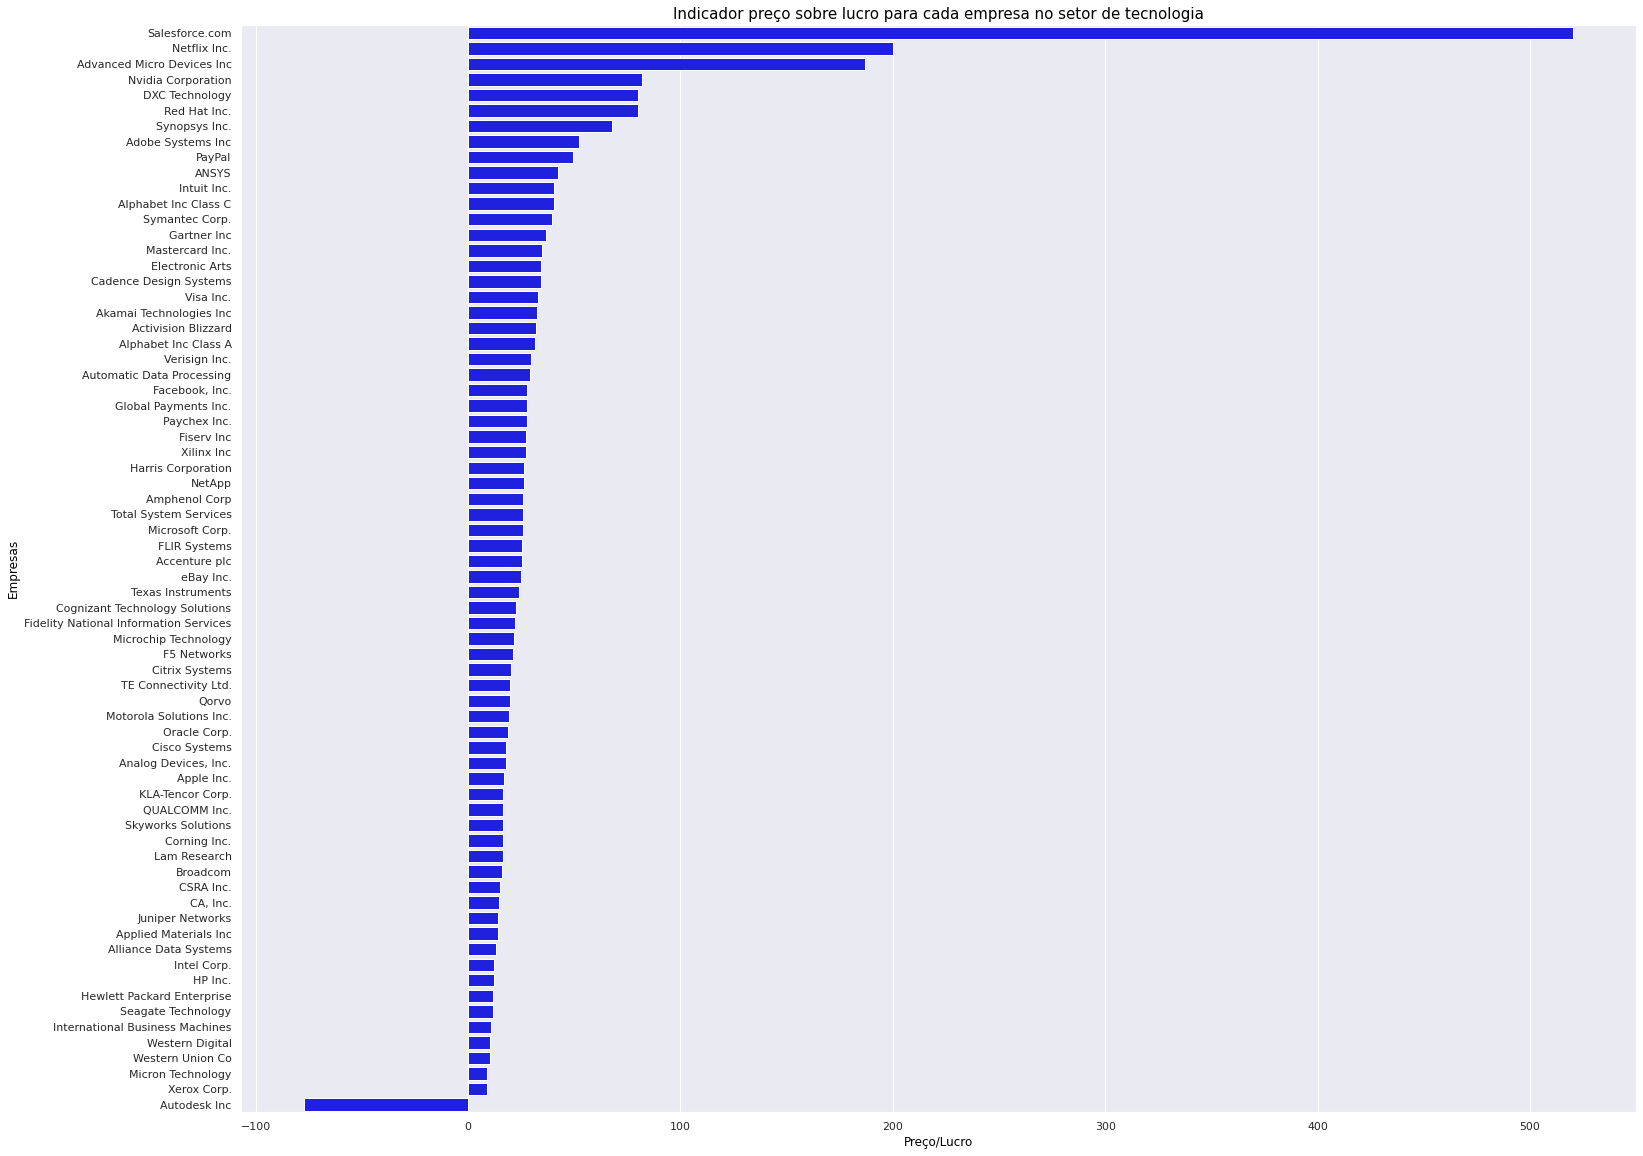

In [18]:
# Gráfico de barras
plt.figure(figsize=[25,20])
sns.barplot(x='P/E', y='Name',data=df_tec, color='blue')
plt.title('Indicador preço sobre lucro para cada empresa no setor de tecnologia', fontsize=15, color='black')
plt.xlabel('Preço/Lucro', color = 'black')
plt.ylabel('Empresas', fontsize = 12, color='black');


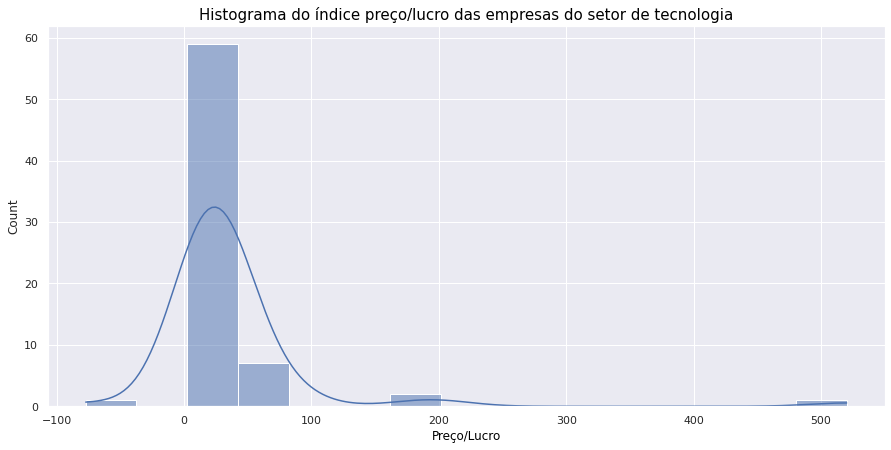

In [21]:
# Histograma para a visualização da distribuição do índice P/E

plt.figure(figsize=[15,7])
sns.histplot(data=df_tec,x='P/E',bins=15,kde=True)
plt.title('Histograma do índice preço/lucro das empresas do setor de tecnologia', fontsize=15, color='black')
plt.xlabel('Preço/Lucro', color = 'black',fontsize=12);


O índice P/E pode significar o quão cara está uma ação (se vale a pena comprar ou não). Quanto mais elevado for o P/E, mais cara ela está. 
Entrentanto, esse índice é baseado na oferta e procura, logo para empresas do ramo de tecnologia, algumas delas tendem a crescer exponencialmente, e isso faz com que a procura seja grande, encarecendo o valor de uma ação.
Por isso, é preciso observar outros indicadores para verificar se a ação está realmente cara ou apenas uma tendência de mercado.

**Alguns pontos levantados no gráfico de barras:**

* As empresa SalesForce, Netflix e Advanceds Micro Devis são as que possuem os maiores índices P/E, especialmente a primeira que ultrapassa os 500 pontos. Para saber se vale a pena investir nessas empresas, teremos que observar também o preço e o lucro de cada ação. Isso nos dará algum indicativo de que há chances da empresa crescer futuramente.
* A única empresa com o P/E negativo é a AutoDesk. Mas não quer dizer necessariamente que é um má indicativo.


**Histograma:**

* Grande parte das empresas possuem altos índices de P/E, e isso é avaliado na análise do boxplot do índice P/E para esse setor.
* A maior parte das empresas se concentra no intervalo de 20 á 40.

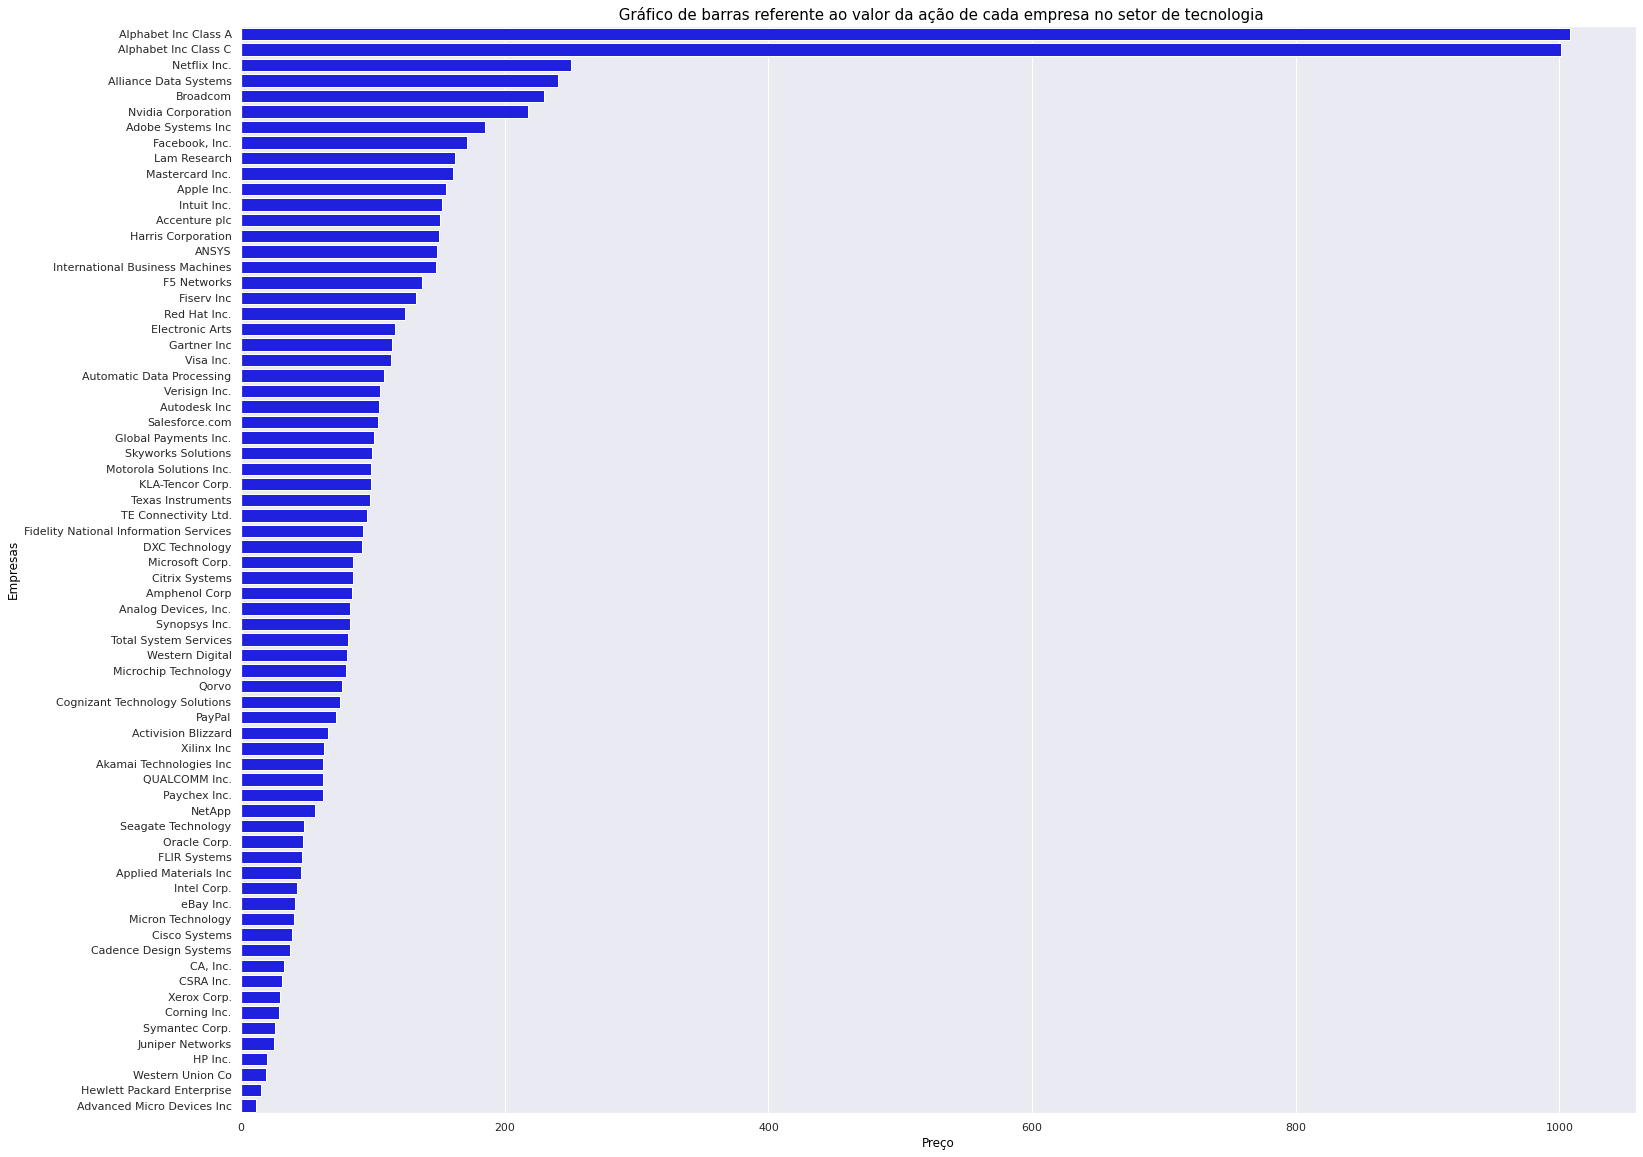

In [22]:
# Redefinindo o dataset em decrescente dos preços de cada ação
df_tec = df_tec.sort_values('Price',ascending=False,)
#Gráfico de barras para o Price (preço das ações):
plt.figure(figsize=[25,20])
sns.barplot(x='Price', y='Name',data=df_tec,color='blue')
plt.title(' Gráfico de barras referente ao valor da ação de cada empresa no setor de tecnologia', fontsize=15, color='black')
plt.xlabel('Preço', color = 'black')
plt.ylabel('Empresas', fontsize = 12, color='black');

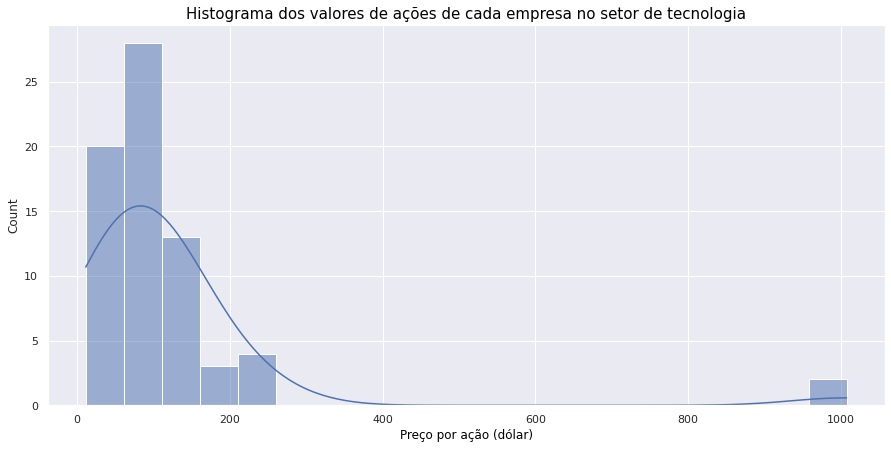

In [23]:
# Histograma para a visualização da distribuição do índice Preço por ação
plt.figure(figsize=[15,7])
sns.histplot(data=df_tec,x='Price',bins=20,kde=True)
plt.title('Histograma dos valores de ações de cada empresa no setor de tecnologia', fontsize=15, color='black')
plt.xlabel('Preço por ação (dólar)', color = 'black',fontsize=12);

Percebe-se que grande parte das empresas possuem ações com valores abaixo de 200 dólares.

Isso é uma análise importante para investidores que buscam empresas mais baratas e lucrativas.

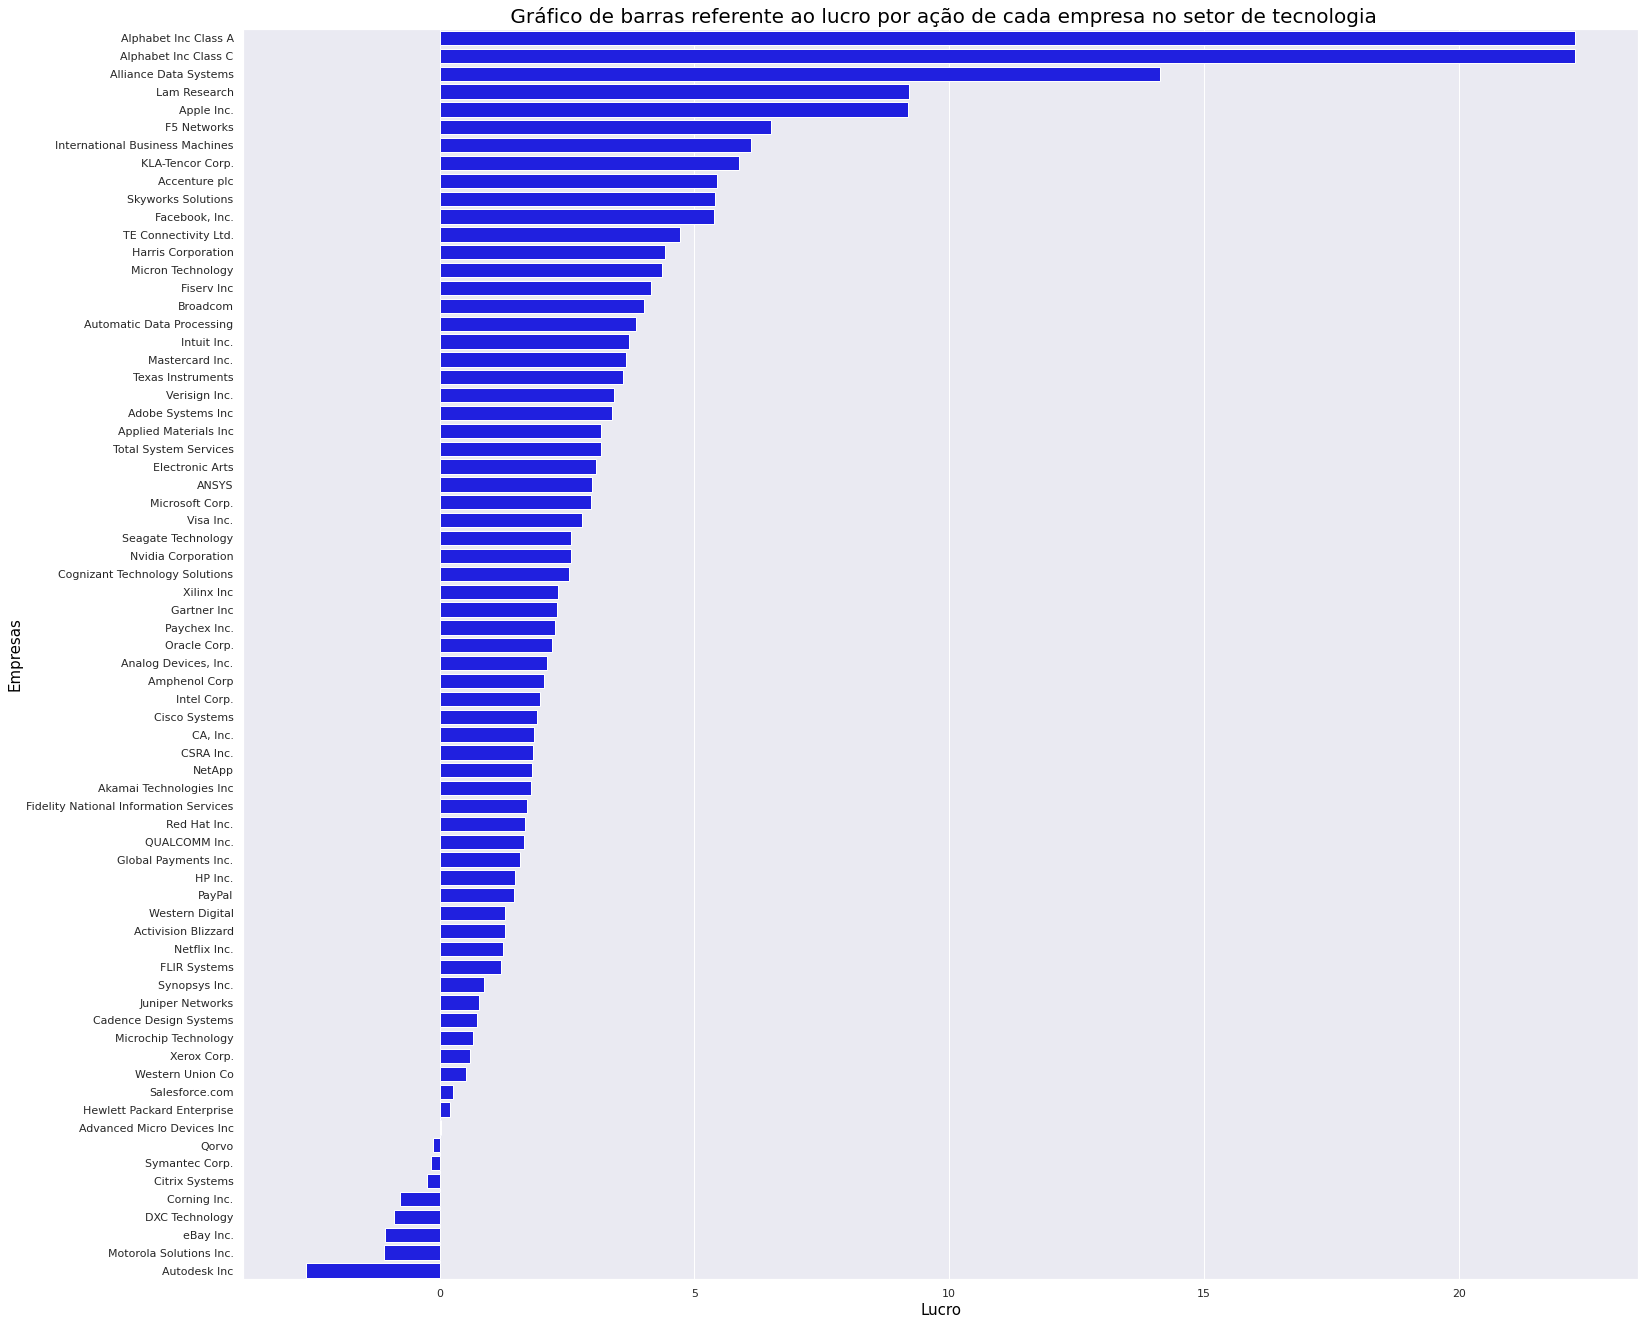

In [24]:
# Redefinindo o dataset em decrescente dos preços de cada ação
df_tec = df_tec.sort_values('E',ascending=False,)
#Gráfico de barras para o lucro das ações:
plt.figure(figsize=[25,23])
sns.barplot(x='E', y='Name',data=df_tec,color='blue')
plt.title(' Gráfico de barras referente ao lucro por ação de cada empresa no setor de tecnologia', fontsize=20, color='black')
plt.xlabel('Lucro', color = 'black', fontsize = 15)
plt.ylabel('Empresas', fontsize = 15, color='black');

**Interpretação dos resultados até o momento**
* As empresas Allians Data System, Alphabet inc Classe A e Alphabet inc Classe C, apesar de estarem entre as 4 ações mais caras, também estão no top 3 de empresas que possuem os maiores lucros por ações.
* Atenção para algumas empresas que estão com lucros negativos.
* Observa-se que a empresa AMD possui uma ação barata e com uma boa lucratividade, e isso faz com que a empresa possa ter retornos consideráveis caso tenha um bom gerenciamento. Mas como ainda não estamos analisando o histórico dos múltiplos de valuation da empresa e nem seu fluxo de caixa (ou DRE), fica difícil ter um alto grau de confiabilidade observando apenas essas análises explorativas.
* Uma outra observação importante, é que a empresa Netflix e a SalesForce demonstram indicativos de um bom retorno a longo prazo para investidores. Mas para ter uma análise mais segura, se faz necessário também analisar os histórico de DRE e o fluxo de caixa. 


**Filtragem de empresas a partir do preço**


---
Como objetivo aqui é escolher as melhores ações para se investir a longo prazo, observando quais ações são mais baratas e quais destas ações ações poderiam se tornar as mais rentáveis com a sua valorização, vamos realizar uma filtragem das ações mais baratas (preço menores que 110 dólares) e que não tenha o lucro negativo.


In [25]:
df_tec_filter_E=df_tec.query("E > 0.0 and Price <110 ") # 40 empresas foram constatadas nessa filtragem

### **Indicador Dividend Yeld**


---
Esse indicador serve para mensurar a performance de uma companhia em relação ao pagamento dos seus proventos. Mas nunca deve ser analisado de forma isolada.
Um DY (Dividend yeld - Rendimento dos dividendos) baixo **pode significar** que a empresa retém os lucros para reinvestimento (o que é uma coisa boa). Já um alto DY **pode ser** que a empresa pague altos dividendos para atrair investidores, uma vez que ela pode estar em crise (indício de má gerenciamento).
Por isso, esse indicador, tem que ser analisado com a conjectura e o momento que a empresa está passando.

In [26]:
df_tec_filter_E['Media_DY']=df_tec_filter_E['DY'].mean() #Adicionando uma nova coluna da média dos dividendos em todo o setor de tecnologia
df_tec_filter_E = df_tec_filter_E.sort_values('DY', ascending=False) # Passando a ordem do maior para o menor em relação ao indicador DY

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Analisando a distribuição dos dividendos dessas empresas:

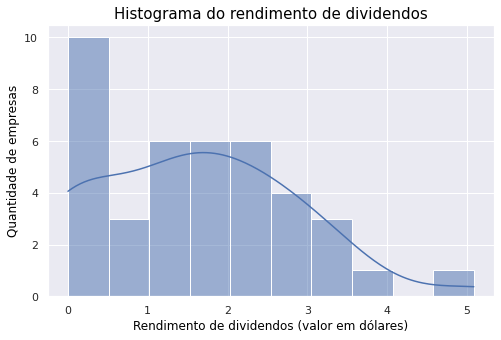

In [29]:

plt.figure(figsize=[8,5])
sns.histplot(x='DY',data=df_tec_filter_E, kde = True,bins=10)
plt.title('Histograma do rendimento de dividendos', fontsize= 15, color='black')
plt.xlabel('Rendimento de dividendos (valor em dólares)', fontsize = 12, color = 'black')
plt.ylabel('Quantidade de empresas', fontsize = 12, color = 'black');

No primeiro instante, pode-se observar que o rendimento dos dividendos de algumas empresas são equivalentes à zero. Isso pode significar que a empresa está em expansão, por isso precisa de capital para reinvestimento.

Em outro momento poderemos analisar essas empresas que não estão pagando dividendo, para verificar se com os outros parâmetros, no qual não se encontram nesse banco de dados (como o ROE, ROIC, DRE, Fluxo de caixa e dados qualitativos), essas empresas podem vir a dar uma boa margem de lucro para seus investidores. 

Além disso, se faz necessário levantar o histórico dos indicadores de valuation, para saber se realmente a empresa em questão está em declínio ou ascenção.


Observa-se também que boa parte das empresas pagam dividendos entre 1 á 5 dólares. 

Para os investidores que queiram apenas os valores de dividendo, pode-se fazer um outro filtro contabilizando intervalo de dividendos que se deseja.

Assim, vamos analisar apenas as empresas que pagam dividendos igual ou maior que 1 dólar, e verificar se é uma boa empresa para se investir a longo prazo por meio dos outros indicadores.

**Filtragem de empresas que pagam dividendo igual ou superior á 1 dólar**

---



---



In [30]:
df_tec_filter_DY = df_tec_filter_E.query('DY >= 1') 
df_tec_filter_DY['Name'].value_counts().sum() # Possuimos agora 27 empresas para analisar

27

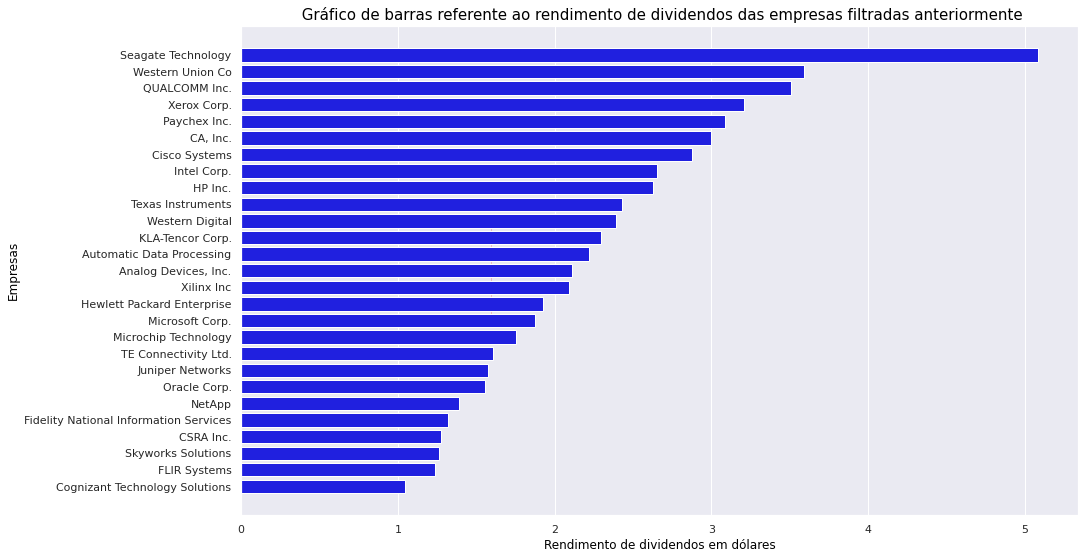

In [31]:
# Redefinindo o dataset em ordem decrescente do rendimento de cada ação
df_tec_filter_DY = df_tec_filter_DY.sort_values('DY',ascending=False,)

#Gráfico de barras:
plt.figure(figsize=[15,9])
sns.barplot(x='DY', y='Name',data=df_tec_filter_DY,color='blue')
plt.title(' Gráfico de barras referente ao rendimento de dividendos das empresas filtradas anteriormente', fontsize=15, color='black')
sns.lineplot(data=df_tec_filter_DY,x='Media_DY', y = 'Name',color='red')
plt.xlabel('Rendimento de dividendos em dólares', color = 'black', fontsize = 12)
plt.ylabel('Empresas', fontsize = 12, color='black');

###**Analisando os indicadores 52 week low e 52 week high**

---

Esses indicadores analisam o valor mais alto e o mais baixo das ações dentro do período um ano.

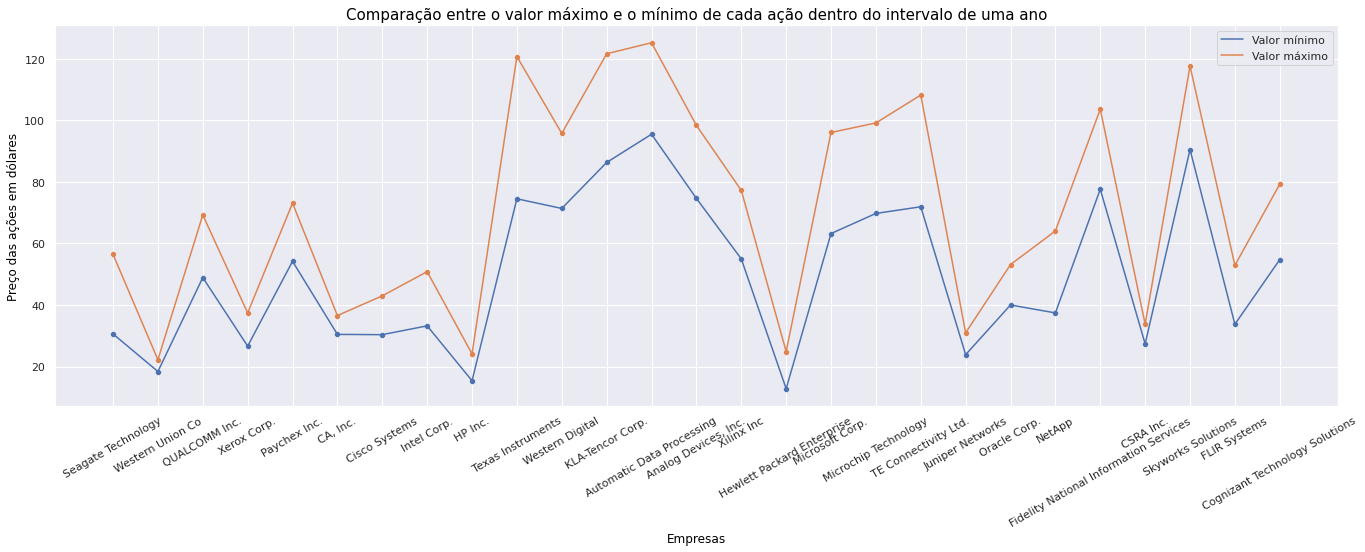

In [32]:
plt.figure(figsize=[23,7])
ax= sns.lineplot(data=df_tec_filter_DY,x='Name',y='52 Week High')
sns.scatterplot(data=df_tec_filter_DY,x='Name',y='52 Week High')
sns.lineplot(data=df_tec_filter_DY,x='Name',y='52 Week Low')
sns.scatterplot(data=df_tec_filter_DY,x='Name',y='52 Week Low')
plt.legend(labels = ["Valor mínimo","Valor máximo"])
plt.xticks(rotation= 30)
plt.title('Comparação entre o valor máximo e o mínimo de cada ação dentro do intervalo de uma ano', fontsize = 15, color = 'black')
plt.xlabel('Empresas', fontsize= 12, color= 'black')
plt.ylabel('Preço das ações em dólares', fontsize= 12, color= 'black');

Nesse gráfico de comparação entre o valor mais alto e o mais baixo de cada ação no período de 1 ano, pode ser interpretado como a variação que uma empresa teve nos seus valores. 

E com isso, podemos dizer que a empresa está sucetível à uma expansão ou contração, no qual vai depender do seu histórico, ou seja, descobrir qual valor veio primeiro, a ação de preço mais elevado ou a de preço mais baixo. Caso o valor de preço mais baixo seja o primeiro, significa que a empresa cresceu e, quanto mais for a variação, mais é a especulação de que ela crescerá ainda mais.

Em relação a variação de preço, as ações que tiveram pouca variação, é um indicativo de que a empresa está mais consolidada que as outras no mercado.

###**Analisando o indicador Market cap (capitalização de mercado)**

---
Esse indicador determina quanto vale uma empresa pelo mercado de ações.
Primeiro, vamos organizar as empresas em categorias da seguinte forma:

* **Empresa grande**: A empresa vale $10 bilhões ou mais.

* **Empresa média**: A empresa vale de 2 bilhões á 10 bilhões de dólares.

* **Empresa pequena**: A empresa vale menos que $2 bilhões.

Segundo, vamos analisar quanto vale cada uma separadamente.

In [33]:
# Categorização das empresas
df_tec_filter_DY['grupo'] = 'Empresa grande'
df_tec_filter_DY.loc[df_tec_filter_DY['Market Cap']< 10000000000,'grupo'] = 'Empresa média'
df_tec_filter_DY.loc[df_tec_filter_DY['Market Cap']< 2000000000, 'grupo'] = 'Empresa pequena'
df_tec_filter_DY['grupo'].value_counts()

Empresa grande    22
Empresa média      5
Name: grupo, dtype: int64

Como podemos ver, não há nenhuma empresa considerada pequena dentre as quais a gente escolheu. E há somente 5 empresas consideras de tamanho médio, as outras 22 empresas se enquadram na categoria de grandes empresas.

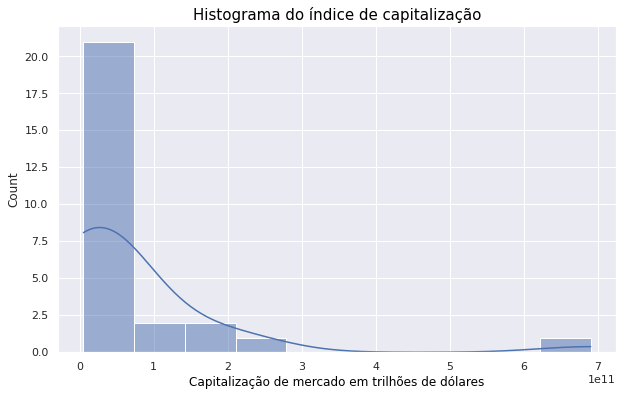

In [38]:
# Histograma para a visualização da distribuição do índice P/E

plt.figure(figsize=[10,6])
sns.histplot(data=df_tec_filter_DY,x='Market Cap',kde=True,bins=10)
plt.title('Histograma do índice de capitalização', fontsize=15, color='black')
plt.xlabel('Capitalização de mercado em trilhões de dólares', color = 'black',fontsize=12);


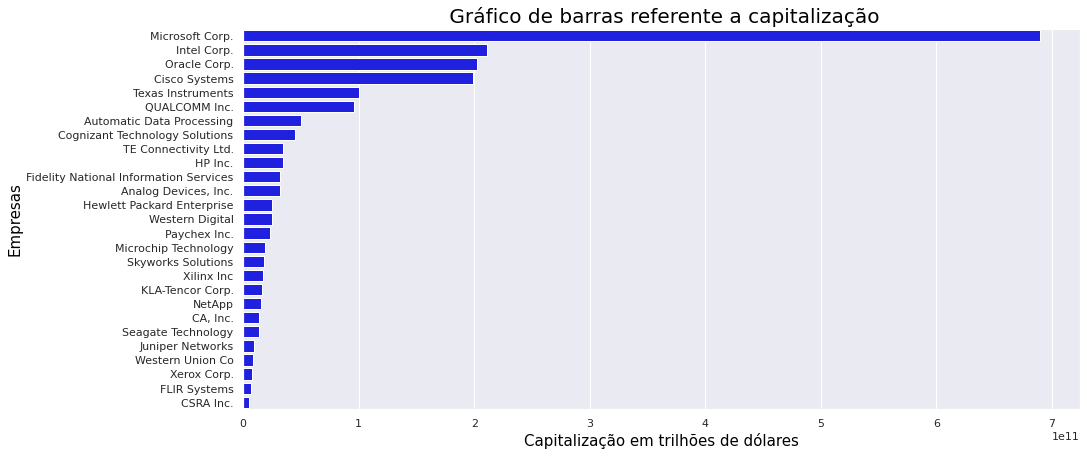

In [39]:
# Redefinindo o dataset em decrescente dos preços de cada ação
df_tec_filter_DY = df_tec_filter_DY.sort_values('Market Cap',ascending=False,)
#Gráfico de barras para o lucro das ações:
plt.figure(figsize=[15,7])
sns.barplot(x='Market Cap', y='Name',data=df_tec_filter_DY,color='blue')
plt.title(' Gráfico de barras referente a capitalização', fontsize=20, color='black')
plt.xlabel('Capitalização em trilhões de dólares', color = 'black', fontsize = 15)
plt.ylabel('Empresas', fontsize = 15, color='black');

**Insights**
* Percebe-se que a empresa (Seagate Technology) que mais paga dividendos aos seus acionistas, não está nem entre as 20 empresas que mais valem no mercado. O que significa dizer que não é por que a empresa é grande, que ela vai pagar muitos dividendos! 


* Percebe-se que há algumas empresas consolidadas no mercado, pagando bons rendimentos e tendo uma boa margem de lucro, e isso pode ser de interesse para aqueles investidores que querem um aporte com mais segurança. 

* Para escolher essas ações de empresas mais consolidadas, temos que fazer uma análise mais detalhada, e observar quais empresas pagam dividendos acima da média, e se o seu indicador PSR (preço sobre vendas) são considerados atraentes no mercado. Quanto menor for esse indicador, mais atraente é a ação. Vale ressaltar que sse indicador é somente utilizado como complemento.

* Outro indicador que teremos que ter atenção é o EBTIDA, que identifica como anda o balanço financeiro da empresa. Pode ser usado tanto para empresas com potencial crescimento, quanto para empresas já consolidadas.

* E por útimo, teremos que analisar o Price/Book, no qual compara a capitalização de mercado de uma empresa com seu valor contábil.


### Adicionando o índice S&P para cada empresa


---
O índice S&P também é uma forma de verificar se a empresa está sendo bem avaliada no mercado.

Esse índice é como se fosse uma normalização do índice de capitalização


In [40]:
# Adicionando uma coluna para o índice
df_tec_filter_DY['S&P']=df_tec_filter_DY['Market Cap']/df_tec_filter_DY['Market Cap'].sum()



### **Indicador PSR ou P/S**


---
Esse indicador significa o índice de preços sobre vendas. Serve como um comparativo entre as empresas, mostrando como o mercado avalia suas receitas. Quanto menor o indicador, melhor!


In [41]:
df_tec_filter_DY['media_P/S']=df_tec_filter_DY['P/S'].mean()
# Organizando em ordem crescente as empresas em relação ao valor de P/S
df_tec_filter_DY = df_tec_filter_DY.sort_values('P/S',ascending=True)

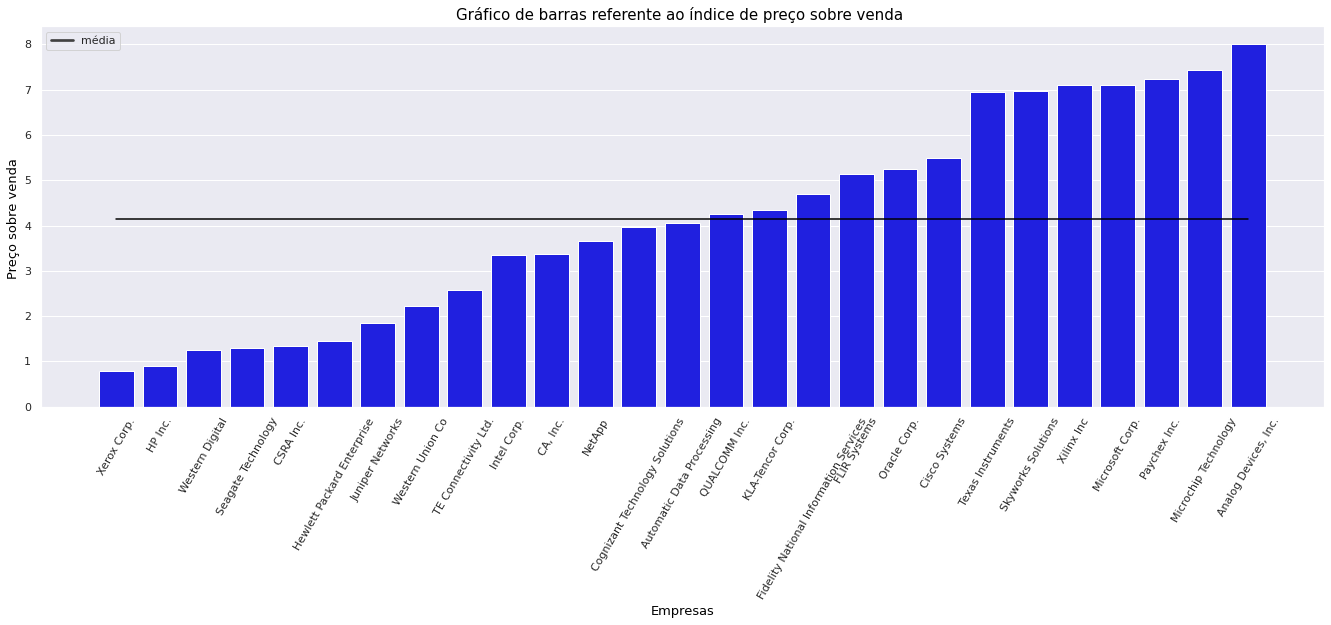

In [44]:
plt.figure(figsize=[23,7])
sns.barplot(data=df_tec_filter_DY, x = 'Name', y= 'P/S', color='blue')
sns.lineplot(data=df_tec_filter_DY,x='Name',y='media_P/S',color='black').legend(['média'])
plt.title('Gráfico de barras referente ao índice de preço sobre venda ', color='black',fontsize = 15)
plt.ylabel('Preço sobre venda ', fontsize = 13, color= 'black')
plt.xlabel('Empresas', fontsize = 13, color= 'black')
plt.xticks(rotation= 60);


Percebe-se que a média desse múltiplo é relativamente baixa (entre 4 e 5), como o máximo é 8, pode ser algo a se considerar. 

### **Analisando o EBITDA:**

Esse indicador avalia os lucros antes de juros, impostos, depreciação e amortização das empresas. Assim, esse indicador avalia o quanto a empresa gera de recursos apenas em suas atividades operacionais, sem levar em consideração os efeitos financeiros e de impostos.


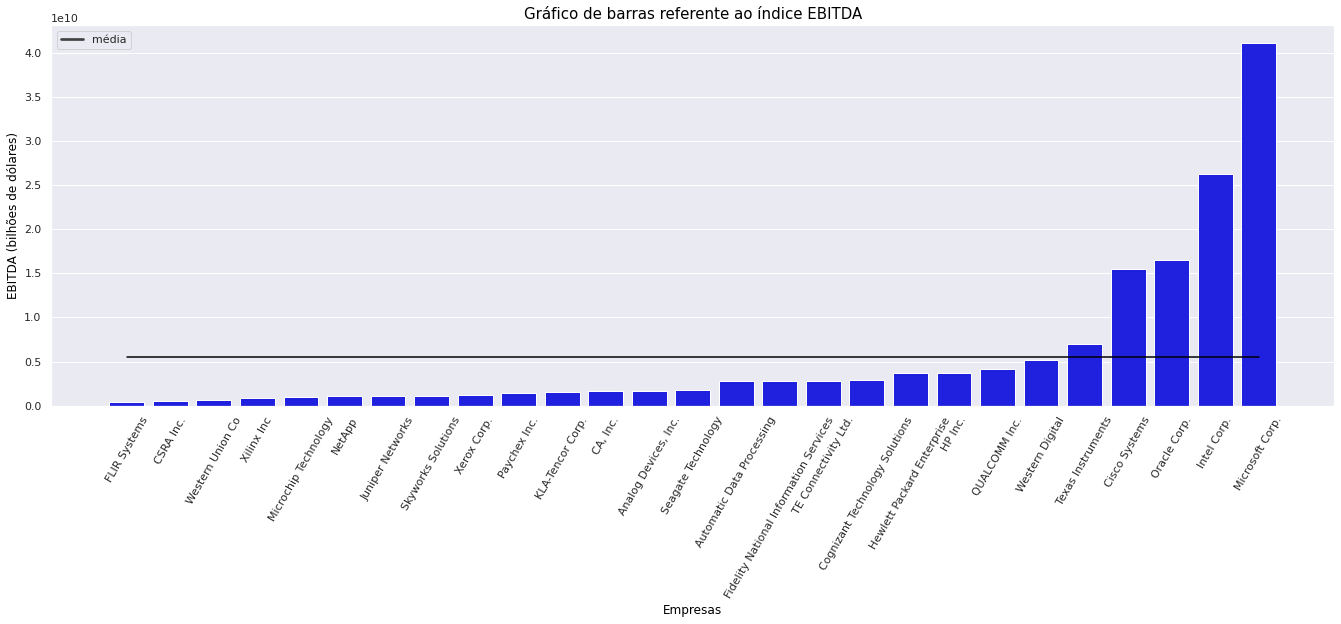

In [46]:
df_tec_filter_DY['media_EBITDA'] = df_tec_filter_DY['EBITDA'].mean()
plt.figure(figsize=[23,7])
sns.barplot(data=df_tec_filter_DY.sort_values('EBITDA'), x = 'Name', y= 'EBITDA', color='blue')
sns.lineplot(data=df_tec_filter_DY.sort_values('EBITDA'),x='Name',y='media_EBITDA',color='black').legend(['média'])
plt.title('Gráfico de barras referente ao índice EBITDA', color='black',fontsize = 15)
plt.ylabel('EBITDA (bilhões de dólares)', fontsize = 12, color= 'black')
plt.xlabel('Empresas', fontsize = 12, color= 'black')
plt.xticks(rotation= 60);

Algumas empresas se destacam nesse índice, que são a Cisco, Oracle, Intel e Microsoft. Elas estão bem acima da média, e a partir disso podemos concluir que no mínimo elas tem uma certa vantagem competitiva no setor de tecnologia em relação à seus concorrentes.

Nesse sentido, para uma melhor análise desse indicador, é necessário analisar também as suas séries temporais.

### **Analisando o P/B (Price/Book):**

Esse indicador compara a capitalização de mercado de uma empresa com seu valor contábil. Em outras palavras, **índices de P/B abaixo de 1** são normalmente considerados **investimentos sólidos**.

Geralmente esse índice é associado com o ROE (Retorno sobre o patrimônio líquido).

As empresas de alto crescimento, geralmente, apresentam índices de P/B bem acima de 1, enquanto que as empresas que enfrentam dificuldades, ocasionalmente, apresentam índices abaixo de 1.

Os investidores podem verificar se essa avaliação é justificada por outras medidas, como seu retorno histórico sobre os ativos ou crescimento no Lucro por ação.


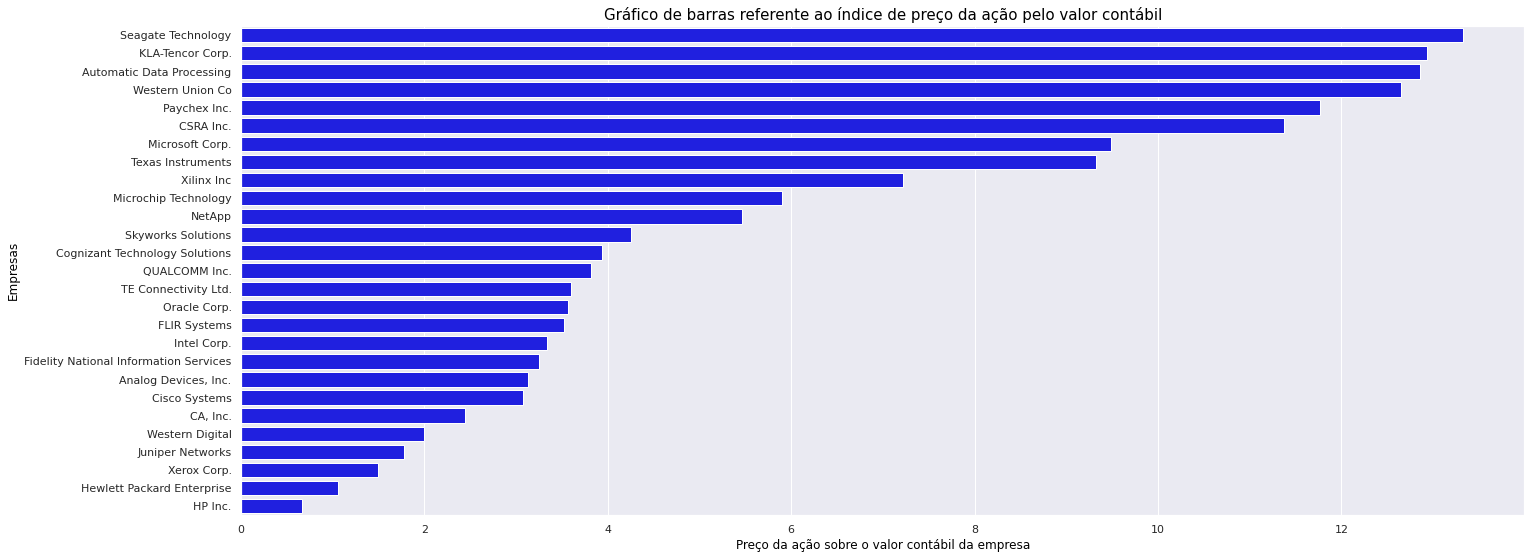

In [47]:

plt.figure(figsize=[23,9])
sns.barplot(data=df_tec_filter_DY.sort_values('P/B', ascending= False), x = 'P/B', y= 'Name', color='blue')
plt.title('Gráfico de barras referente ao índice de preço da ação pelo valor contábil', color='black',fontsize = 15)
plt.ylabel('Empresas', fontsize = 12, color= 'black')
plt.xlabel('Preço da ação sobre o valor contábil da empresa', fontsize = 12, color= 'black');

Quase todas as empresas estão acima de 1, logo é nítido que as empresas selecionadas até aqui estão bem em relação a esse índice.

Vale ressaltar que ações abaixo de 1 podem estar subvalorizadas, e a depender da boa gestão da empresa e do seu background no mercado em relação à seus indicadores, pode ser uma boa opção de compra.

Apesar de que valores muito acima de 1, podem demonstrar o contrário, ou seja, demonstrar ações supervalorizadas, temos que ter em mente que esse indicador ignora ativos intangíveis como por exemplo a marca de empresa, e um bom exemplo disso é a microsoft.

### Reavaliando os preços de cada ação e os valores de dividendos

---



---



**Nova filtragem**


---
Antes de prosseguirmos com a reavaliação de preços, como EBITDA é determinante para a escolha de boa ações, juntamente com a análise positiva do preço da ação sobre o valor contábil, vamos filtrar as 7 empresas com os maiores valores de EBITDA. E depois realizar a reavaliação de preços e rendimento de dividendos


In [48]:
# Filtrando as 7 empresas com os maiores valores de EBITDA
df_tec_filter_EBITDA = df_tec_filter_DY.sort_values('EBITDA',ascending=False).head(7)


**Reavaliação dos preços**

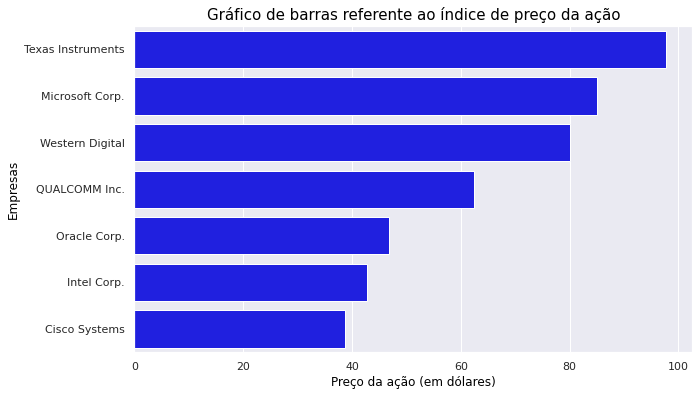

In [49]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_tec_filter_EBITDA.sort_values('Price', ascending= False), x = 'Price', y= 'Name', color='blue')
plt.title('Gráfico de barras referente ao índice de preço da ação', color='black',fontsize = 15)
plt.ylabel('Empresas', fontsize = 12, color= 'black')
plt.xlabel('Preço da ação (em dólares)', fontsize = 12, color= 'black');

**Reavaliando o rendimento dos dividendos**

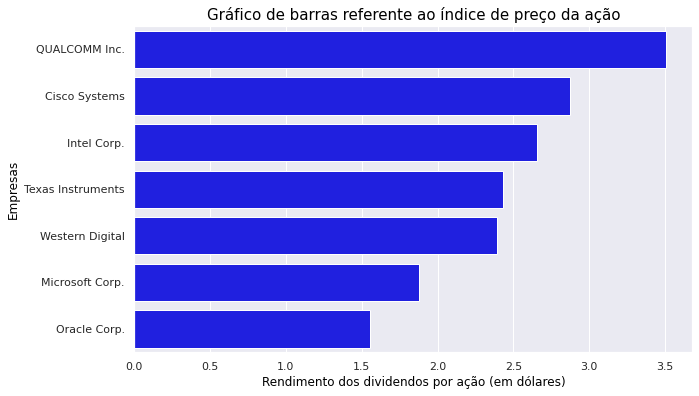

In [50]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_tec_filter_EBITDA.sort_values('DY', ascending= False), x = 'DY', y= 'Name', color='blue')
plt.title('Gráfico de barras referente ao índice de preço da ação', color='black',fontsize = 15)
plt.ylabel('Empresas', fontsize = 12, color= 'black')
plt.xlabel('Rendimento dos dividendos por ação (em dólares)', fontsize = 12, color= 'black');

### Payback

**Calculando o Payback das 7 empresas**


---
Considerando uma situação hipotética de que as ações não vão valorizar ou desvalorizar ao longo do tempo, e analisando os indicadores dessas empresas, podemos dizer em quanto tempo o investidor terá o retorno do valor investido por meio dos dividendos. 

Para o cálculo, vamos considerar que as empresas pagam mensalmente seus dividendos.


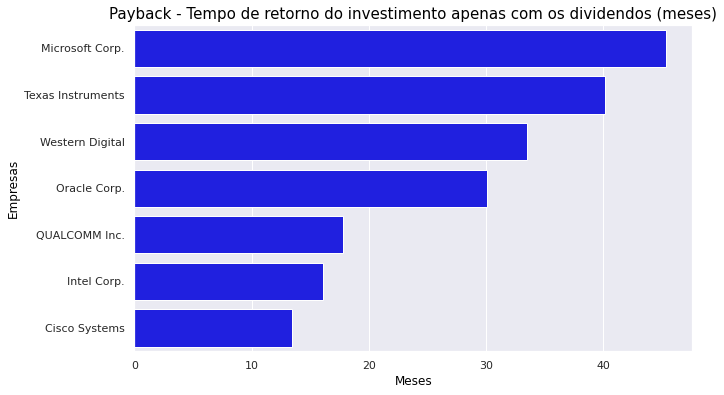

In [52]:
# Calculando o payback
df_tec_filter_EBITDA['Payback'] = df_tec_filter_EBITDA['Price']/df_tec_filter_EBITDA['DY']

# Construção do gráfio
plt.figure(figsize=[10,6])
sns.barplot(data=df_tec_filter_EBITDA.sort_values('Payback', ascending= False), x = 'Payback', y= 'Name', color='blue')
plt.title('Payback - Tempo de retorno do investimento apenas com os dividendos (meses)', color='black',fontsize = 15)
plt.ylabel('Empresas', fontsize = 12, color= 'black')
plt.xlabel('Meses', fontsize = 12, color= 'black');

###**Conclusão**

Como não há um histórico dos indicadores dentro do banco de dados, não tem como predizer a margem de valores das ações com o passar dos anos, e também não tem com afirmar com um alto grau de confiabilidade quais são as ações mais rentáveis a longo prazo.

Entretano, podemos dizer quais ações estão pagando bons dividendos e também dizer quais ações tem um melhor payback dada as condições ditas anteriormente. As quatro ações que mais pagam dividendos proporcionais ao valor de suas ações são (Em ordem crescente com relação ao tempo de retorno):

* Cisco Systems (teve o melhor desempenho)
* Intel Corp.
* QUALCOMM Inc.
* Oracle Corp.

Podemos o observar que essas 4, coincidentemente, também são as que tem o menor valor de preço, mostrando que os rendimentos são proporcionais entre elas.

Para uma análise mais confiável, é necessário analisar o DRE, o fluxo de caixa, o contexto de mercado dessas empresas, além do histórico de seus múltiplos. Assim, poderemos ter uma melhor confiabilidade na indicação dessas ações para o perfil de investidores escolhido anteriormente.